# Project 3

by Jenny Holth Hartting and Alexander Schei-Guldahl

This notebook contains sections for building and optimizing machine learning models. Above each section, you will find concise descriptions of the process and objectives.

In [1]:
from Functions import find_hyperparameters, automate_parameter_search, heatmap_acc, FashionPlot, format_seconds
import numpy as np
from Utilities import cat_loss, cat_loss_der, softmax

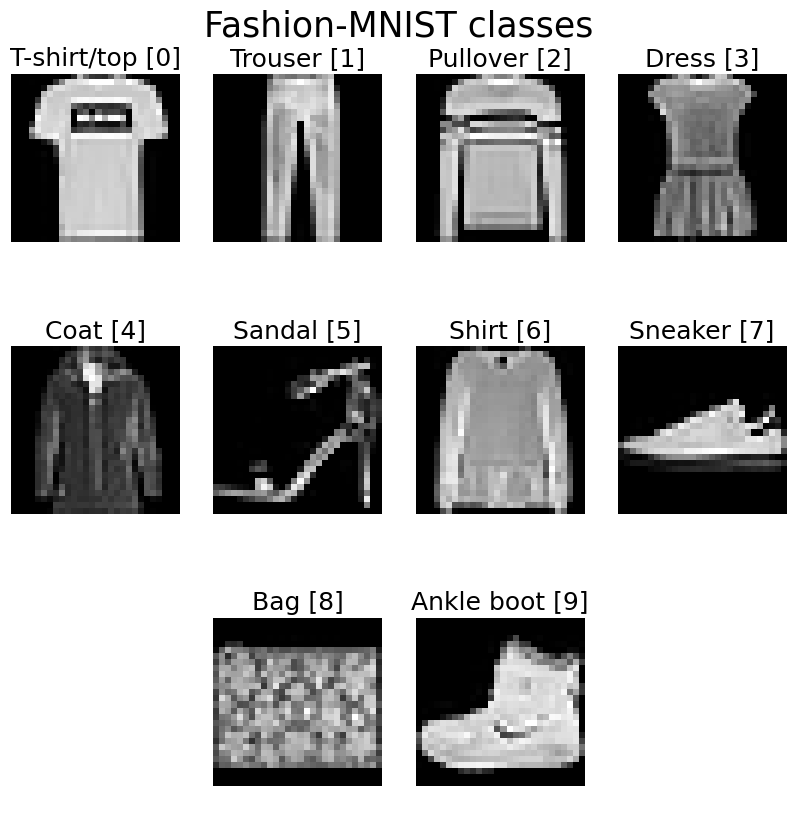

In [2]:
FashionPlot()

# Feed Forward Neural Network with Keras

This section initializes parameters and uses Keras to train a feed-forward neural network.

####   FNNK_Run: If set to True, the code runs all calculations, including training with various parameters.
#####   Warning: This can take a long time, so it's recommended to leave it as False unless checking if code is able to run. If left False you need an underfolder "data" which can be found in our github

In [3]:
initial_conditions = {
    "activation_funcs": [softmax],  # List of activation functions to use in the network; here using softmax for classification.
    "activation_ders": [None],      # Derivatives of the activation functions; None if derivatives are computed internally.
    "cost_fun": cat_loss,           # The cost function for optimization, for example categorical cross-entropy for multi-class classification.
    "cost_der": cat_loss_der,       # Derivative of the cost function for backpropagation.
    "batch_size": 20,               # Number of samples per batch during training.
    "beta1": 0.7,                   # Exponential decay rate for the first moment in Adam optimizer.
    "beta2": 0.999,                 # Exponential decay rate for the second moment in Adam optimizer.
    "epochs": 50,                   # Number of iterations over the entire dataset during training.
    "n_categories": 10,             # Number of output classes/categories in the classification task.
    "Delta": 1e-9,                  # A small constant to prevent division by zero in optimization algorithms.
    "eta": 0.1,                     # Learning rate for gradient descent or other optimizers.
    "l2": 0.0,                      # L2 regularization term for penalizing large weights (set to 0 for no regularization).
    "data_amount": 10000,           # Number of data samples to use from the dataset.
    "input_shape": (28,28,1),       # Shape of the input data; here it represents grayscale images of size 28x28 with 1 channel.
    "kernel": (3,3),                # Kernel size for convolutional layers, defining the filter dimensions.
    "n_filters": 10,                # Number of filters in the convolutional layers.
    "n_neurons_connected": 50,      # Number of neurons in fully connected layers after convolutional layers.
    "neurons": 30,                  # Number of neurons in each hidden layer.
    "n_layers": 1                   # Number of layers in the model, 1 being output layer. 
}

In [4]:
FNNK_condition = {
    "neurons": 30,
    "n_layers": 2,      #Hidden layers + 1 (output layer)
}

eta_vals_FNN = np.logspace(-5, -2, 4)
epoch_vals_FNN = np.linspace(40,80, 5).astype(int)

FNNK_Run = False

In [5]:
FNN_eta_epoch_matrix, FNN_eta_vals, FNN_epoch_vals, FNN_eta_epoch_timematrix = automate_parameter_search(
                    ModelType = "FNN_LR_Keras", 
                    Save = FNNK_Run , Filename = "FNNK_Eta_Epochs", 
                    Params = ["eta", "epochs"], 
                    Param_Vals = [eta_vals_FNN, epoch_vals_FNN], 
                    Initial_Conditions = initial_conditions,
                    Custom = FNNK_condition
                    )

In [6]:
best_eta_FNN, best_epoch_FNN, max_acc_FNN, runtime_FNN = find_hyperparameters(FNN_eta_epoch_matrix, FNN_eta_vals, FNN_epoch_vals, FNN_eta_epoch_timematrix)

print(f"Best Eta    = {best_eta_FNN:.3g}")
print(f"Best Epochs = {best_epoch_FNN}")
print(f"Giving ACC  = {max_acc_FNN:.3g}")
print(f"Runtime     = {runtime_FNN:.1f} s")
FNNK_condition["eta"] = best_eta_FNN
FNNK_condition["epochs"] = best_epoch_FNN

Best Eta    = 0.0001
Best Epochs = 50
Giving ACC  = 0.858
Runtime     = 26.7 s


In [7]:
neuron_vals = np.arange(20,51,10)
layers_vals = [2,3,4]

In [8]:
FNN_neuron_layer_matrix, FNN_layer_vals, FNN_neuron_vals, FNN_layer_neuron_timematrix = automate_parameter_search(
                    ModelType = "FNN_LR_Keras", 
                    Save = FNNK_Run, Filename = "FNNK_Neuron_Layers", 
                    Params = ["n_layers", "neurons"], 
                    Param_Vals = [layers_vals , neuron_vals], 
                    Initial_Conditions = initial_conditions,
                    Custom = FNNK_condition
                    )

In [9]:
best_layers_FNN, best_neurons_FNN, max_acc_FNN2, runtime_FNN2 = find_hyperparameters(FNN_neuron_layer_matrix, FNN_layer_vals, FNN_neuron_vals, FNN_layer_neuron_timematrix)


print(f"Best n layers    = {best_layers_FNN}")
print(f"Best neurons     = {best_neurons_FNN}")
print(f"Giving ACC       = {max_acc_FNN2:.3g}")
print(f"Runtime          = {runtime_FNN2:.1f} s")
FNNK_condition["n_layers"] = best_layers_FNN
FNNK_condition["neurons"] = best_neurons_FNN

Best n layers    = 4
Best neurons     = 50
Giving ACC       = 0.861
Runtime          = 33.3 s


In [ ]:
print("Optimal parameters for FNN with Keras")
for i in FNNK_condition:
    print(f"{i}:   {FNNK_condition[i]}")

Optimal parameters for FFN with Keras
neurons:   50
n_layers:   4
eta:   0.0001
epochs:   50


# Custom Feed Forward Neural Network from own code
In this section, a custom implementation of a feed-forward neural network is trained.

First learning rate (eta) and epochs are tuned to find optimal values, the amount of neurons and layer size.
The results are stored for comparison with other models.

FNNO_Run: If set to True, the code runs all calculations, including training with various parameters.


In [11]:
FNNO_condition = {
    "neurons": 30,
    "n_layers": 2,      #Hidden layers + 1 (output layer)
    "epochs": 550
}
eta_vals_FNNO = np.logspace(-4, -1, 4)
epoch_vals_FNNO = np.linspace(50, 450, 5).astype(int)

FNNO_Run = False

In [12]:
FNNO_eta_epoch_mtrx, FNNO_eta_vals, FNNO_epoch_vals, FNNO_eta_epoch_tmtrx = automate_parameter_search(
                    ModelType = "FNN_LR", 
                    Save = FNNO_Run, Filename = "FNNO_Eta_Epochs", 
                    Params = ["eta", "epochs"], 
                    Param_Vals = [eta_vals_FNNO, epoch_vals_FNNO], 
                    Initial_Conditions = initial_conditions,
                    Custom = FNNO_condition
                    )

In [13]:
best_eta_FNNO, best_epoch_FNNO, max_acc_FNNO, runtime_FNNO = find_hyperparameters(FNNO_eta_epoch_mtrx, FNNO_eta_vals, FNNO_epoch_vals, FNNO_eta_epoch_tmtrx)
best_epoch_FNNO = FNNO_epoch_vals[0] 

print(f"Best Eta    = {best_eta_FNNO}")
print(f"Best Epochs = {best_epoch_FNNO}")
print(f"Giving ACC  = {max_acc_FNNO:.3g}")
print(f"Runtime     = {runtime_FNNO:.1f}s") 

FNNO_condition["eta"] = best_eta_FNNO
FNNO_condition["epochs"] = best_epoch_FNNO

Best Eta    = 0.01
Best Epochs = 50
Giving ACC  = 0.833
Runtime     = 103.4s


In [14]:
neuron_vals = np.arange(20,51,10).astype(int)
layers_vals = [2,3,4]

In [15]:
FNNO_neuron_layer_matrix, FNNO_layer_vals, FNNO_neuron_vals, FNNO_layer_neuron_timematrix = automate_parameter_search(
                    ModelType = "FNN_LR", 
                    Save = FNNO_Run, Filename = "FNNO_Layer_Neuron", 
                    Params = ["n_layers", "neurons"], 
                    Param_Vals = [layers_vals , neuron_vals], 
                    Initial_Conditions = initial_conditions,
                    Custom = FNNO_condition
                    )

In [16]:
best_layers_FNNO, best_neurons_FNNO , max_acc_FNNO2, runtime_FNNO2 = find_hyperparameters(FNNO_neuron_layer_matrix, FNNO_layer_vals, FNNO_neuron_vals, FNNO_layer_neuron_timematrix)

print(f"Best n layers    = {best_layers_FNNO}")
print(f"Best neurons     = {best_neurons_FNNO}")
print(f"Giving ACC       = {max_acc_FNNO2:.3g}")
print(f"Runtime          = {runtime_FNNO2:.1f}s")
FNNO_condition["n_layers"] = best_layers_FNNO
FNNO_condition["neurons"] = best_neurons_FNNO

Best n layers    = 2
Best neurons     = 40
Giving ACC       = 0.833
Runtime          = 19.0s


In [ ]:
print("Optimal parameters for FNN with own code")
for i in FNNO_condition:
    print(f"{i}: {FNNO_condition[i]}")

Optimal parameters for FFN with own code
neurons: 40
n_layers: 2
epochs: 50
eta: 0.01


In [18]:
eta_tix_FNN = [f'{float(text):.0e}' for text in FNN_eta_vals]
eta_tix_FNNO = [f'{float(text):.0e}' for text in FNNO_eta_vals]

FNNMatrixPlot = [FNN_eta_epoch_matrix , FNN_neuron_layer_matrix , FNNO_eta_epoch_mtrx , FNNO_neuron_layer_matrix]
FNNMatrixYName = [r"Learning rate ($\eta$)" , "Layers" , r"Learning rate ($\eta$)" , "Layers" ]
FNNMatrixY = [eta_tix_FNN , FNN_layer_vals , eta_tix_FNNO , FNNO_layer_vals]

FNNMatrixXName = ["Epochs" , "Neurons" ,  "Epochs" , "Neurons"]
FNNMatrixX = [FNN_epoch_vals, FNN_neuron_vals , FNNO_epoch_vals , FNNO_neuron_vals]
FNNMatrixTitle = [f"FNN Keras accuracy \n over learning rate and epochs" , f"FNN Keras accuracy \n over neurons and layers" , 
                  f"FNN Own accuracy \n over learning rate and epochs" , f"FNN Own accuracy \n over neurons and layers"]


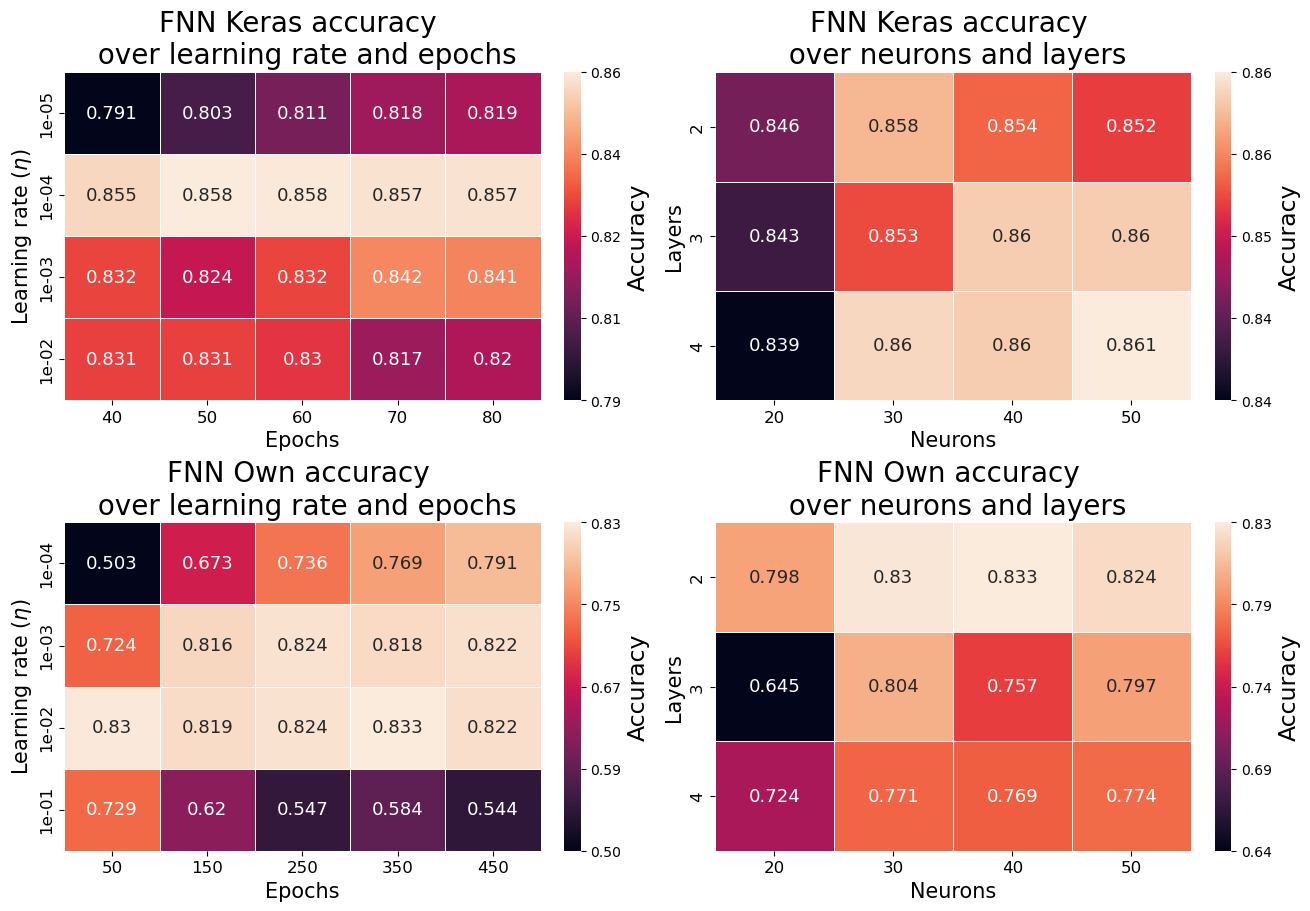

In [19]:
heatmap_acc(FNNMatrixPlot, 
            FNNMatrixTitle, 
            FNNMatrixYName,
            FNNMatrixXName, FNNMatrixY, FNNMatrixX, 
            Figsize=(13,9) , Sub=True)

# Logistic Regression with Keras

Using Keras to train a logistic regression model. 

Optimal learning rates and epochs are identified to maximize performance.

In [20]:
LRK_condition = {
    "n_layers": 1,      #Hidden layers + 1 (output layer)
}

LRK_Run = False

In [21]:
eta_vals_LR = np.logspace(-5, -2, 4)
epoch_vals_LR = np.linspace(50,90,5).astype(int)

In [22]:
LRK_eta_epoch_matrix, LRK_eta_vals, LRK_epoch_vals, LRK_eta_epoch_timematrix = automate_parameter_search(
                    ModelType = "FNN_LR_Keras", 
                    Save = LRK_Run, Filename = "LRK_Eta_Epoch", 
                    Params= ["eta", "epochs"], 
                    Param_Vals = [eta_vals_LR, epoch_vals_LR], 
                    Initial_Conditions = initial_conditions,
                    Custom = LRK_condition 
                    )

In [23]:
best_eta_LRK, best_epoch_LRK, LRK_max_acc1, LRK_runtime1 = find_hyperparameters(LRK_eta_epoch_matrix, LRK_eta_vals, LRK_epoch_vals, LRK_eta_epoch_timematrix)
print(f"Best Eta    = {best_eta_LRK}")
print(f"Best Epochs = {best_epoch_LRK}")
print(f"Giving ACC  = {LRK_max_acc1:.3g}")
print(f"Runtime     = {LRK_runtime1:.1f} s")
LRK_condition["eta"] = best_eta_LRK
LRK_condition["epochs"] = best_epoch_LRK

Best Eta    = 0.0001
Best Epochs = 90
Giving ACC  = 0.837
Runtime     = 49.3 s


In [24]:
print("Optimal parameters for LR with Keras")
for i in LRK_condition:
    print(f"{i}: {LRK_condition[i]}")

Optimal parameters for LR with Keras
n_layers: 1
eta: 0.0001
epochs: 90


# Custom Logistic Regression with own code

In this section, a custom implementation of logistic regression.

Learning rate (eta) and epochs are tuned to find optimal values.

The results are stored for comparison with other models.

In [25]:
LRO_condition = {
    'n_layers': 1, 
}
LRO_Run = False
eta_vals_LRO = np.logspace(-4, -1, 4)
epoch_vals_LRO = np.linspace(50,850,5).astype(int)

In [26]:
LRO_eta_epoch_matrix, LRO_eta_vals, LRO_epoch_vals, LRO_eta_epoch_timematrix = automate_parameter_search(
                    ModelType = "FNN_LR", 
                    Save = LRO_Run, Filename = "LRO_Eta_Epoch", 
                    Params = ["eta", "epochs"], 
                    Param_Vals = [eta_vals_LRO, epoch_vals_LRO], 
                    Initial_Conditions = initial_conditions,
                    Custom = LRO_condition 
                    )

In [27]:
best_eta_LRO, best_epoch_LRO, LRO_max_acc1, LRO_runtime1 = find_hyperparameters(LRO_eta_epoch_matrix, 
                                                                    LRO_eta_vals, LRO_epoch_vals, LRO_eta_epoch_timematrix)
print(f"Best Eta    = {best_eta_LRO}")
print(f"Best Epochs = {best_epoch_LRO}")
print(f"Giving ACC  = {LRO_max_acc1:.3g}")
print(f"Runtime     = {LRO_runtime1:.1f} s")
LRO_condition["eta"] = best_eta_LRO
LRO_condition["epochs"] = best_epoch_LRO

Best Eta    = 0.001
Best Epochs = 650
Giving ACC  = 0.834
Runtime     = 82.3 s


In [28]:
print("Optimal parameters for LRK using own code")
for i in LRO_condition:
    print(f"{i}: {LRO_condition[i]}")

Optimal parameters for LRK using own code
n_layers: 1
eta: 0.001
epochs: 650


In [29]:
eta_tix_LRK = [f'{float(text):.0e}' for text in LRK_eta_vals]
eta_tix_LRO = [f'{float(text):.0e}' for text in LRO_eta_vals]

LRMatrixPlot = [LRK_eta_epoch_matrix , LRO_eta_epoch_matrix]
LRMatrixYName = [r"Learning rate ($\eta$)" ,  r"Learning rate ($\eta$)" ]
LRMatrixY = [eta_tix_LRK , eta_tix_LRO]
LRMatrixXName = [r"Epochs" , "Epochs"]
LRMatrixX = [LRK_epoch_vals , LRO_epoch_vals]
LRMatrixTitle = [f"LR Keras accuracy \n over learning rate and epochs" , f"LR Own accuracy \n over learning rate and epochs"]

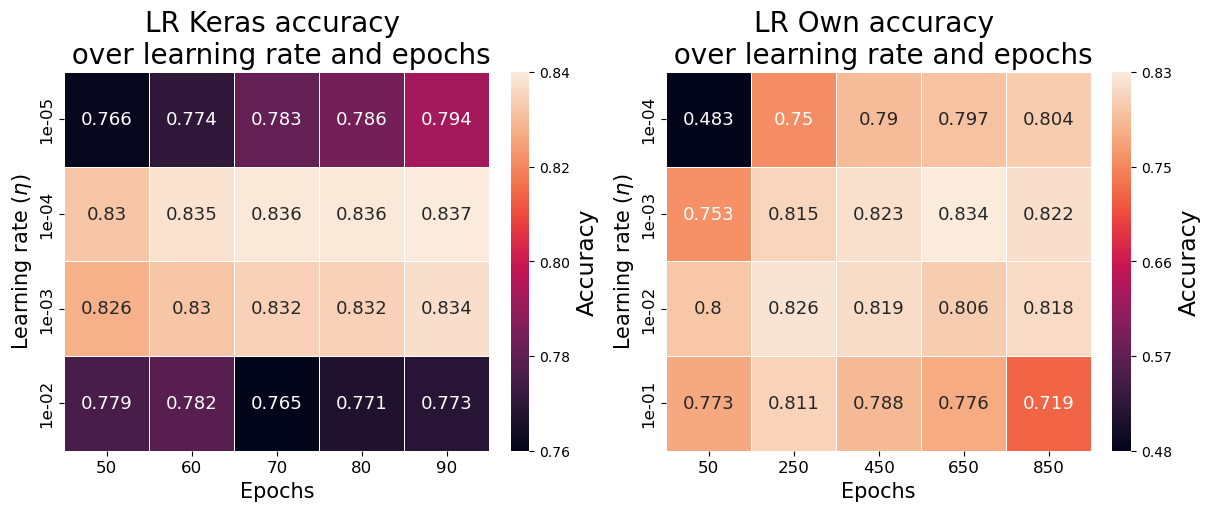

In [30]:
heatmap_acc(LRMatrixPlot, 
            LRMatrixTitle, 
            LRMatrixYName,
            LRMatrixXName, LRMatrixY, LRMatrixX, 
            Figsize=(12,5) , Sub=True)

# Final Evaluation for LR and FNN

This section evaluates all trained models with the best parameters on the full dataset.

The results are compared to understand the effectiveness of different approaches.

In [31]:
from Functions import NeuralNet, RunKeras, RewriteDict, save_load_data_single
from sklearn.metrics import classification_report

## Feed Forward

In [32]:
initial_conditions["data_amount"] = 60000
LRO_condition["data_amount"] = 60000
LRK_condition["data_amount"] = 60000
FNNO_condition["data_amount"] = 60000
FNNK_condition["data_amount"] = 60000
FNNK_Full_Run = False

In [33]:
def RunFNNK(Run):
    if Run:
        FeedNNK_Conditions = RewriteDict(initial_conditions, FNNK_condition)
        FNNK_pred, FNNK_Target_Test, FNNK_Scores, FNNK_Runtime = RunKeras(FeedNNK_Conditions, CNN = False, BothTimes=True)
        return FNNK_pred, FNNK_Target_Test, FNNK_Scores, FNNK_Runtime
    else:
        return 0, 0, 0, 0

FNNK_pred, FNNK_Target_Test, FNNK_Scores, FNNK_Runtime = RunFNNK(FNNK_Full_Run)

In [34]:
def RunFNNKSave(Run,FNNK_pred, FNNK_Target_Test, FNNK_Scores, FNNK_Runtime):
    if Run:
        FNNK_pred = np.argmax(FNNK_pred,axis=1)
        FNNK_Target_Test = np.argmax(FNNK_Target_Test,axis=1)
        save_load_data_single("FNNK_Full",FNNK_pred, FNNK_Target_Test, FNNK_Scores[1], FNNK_Runtime,  Save=True)


RunFNNKSave(FNNK_Full_Run, FNNK_pred, FNNK_Target_Test, FNNK_Scores, FNNK_Runtime)


In [35]:
FNNK_pred, FNNK_Target_Test, FNNK_Scores, FNNK_Runtime = save_load_data_single("FNNK_Full")

In [36]:
m, s = format_seconds(FNNK_Runtime)
FNNK_Report = classification_report(FNNK_Target_Test, FNNK_pred, digits=3, output_dict=True)

print(f"Feed-Forward using Keras")
print(classification_report(FNNK_Target_Test, FNNK_pred, digits=3))
print(f"Giving ACC:       {FNNK_Scores*100:.1f}%")
print(f"Total Runtime:    {np.sum(FNNK_Runtime):.1f} s")
print(f"Training Runtime: {m[0]:.0f} m {s[0]:.1f} s")
print(f"Test     Runtime: {s[1]:.1f} s")


Feed-Forward using Keras
              precision    recall  f1-score   support

           0      0.793     0.858     0.824      1000
           1      0.992     0.966     0.979      1000
           2      0.780     0.821     0.800      1000
           3      0.890     0.886     0.888      1000
           4      0.823     0.791     0.807      1000
           5      0.961     0.954     0.957      1000
           6      0.708     0.673     0.690      1000
           7      0.914     0.959     0.936      1000
           8      0.978     0.954     0.966      1000
           9      0.964     0.932     0.948      1000

    accuracy                          0.879     10000
   macro avg      0.880     0.879     0.879     10000
weighted avg      0.880     0.879     0.879     10000

Giving ACC:       87.9%
Total Runtime:    346.4 s
Training Runtime: 5 m 45.6 s
Test     Runtime: 0.7 s


In [37]:
FNNO_Full_Run = False

In [38]:
def RunFNNO(Run):
    if Run:
        FNNO_pred, FNNO_Score, FNNO_Target_Test, FNNO_Runtimes = NeuralNet(initial_conditions, Custom = FNNO_condition, BothTimes=True)
        return FNNO_pred, FNNO_Score, FNNO_Target_Test, FNNO_Runtimes
    else:
        return 0,0,0,0

#Change to True to run if pre-saved data is not available
FNNO_pred, FNNO_Score, FNNO_Target_Test, FNNO_Runtimes = RunFNNO(FNNO_Full_Run) 

In [39]:
def SaveFNNO(Run, FNNO_pred, FNNO_Score, FNNO_Target_Test, FNNO_Runtimes):
    if Run:
        FNNO_pred = np.argmax(FNNO_pred,axis=1)
        FNNO_Target_Test = np.argmax(FNNO_Target_Test,axis=1)
        save_load_data_single("FNNO_Full",FNNO_pred, FNNO_Target_Test, FNNO_Score, FNNO_Runtimes, Save=True)
        
#Change to True to run and save/override data if pre-saved data is not available
SaveFNNO(FNNO_Full_Run, FNNO_pred, FNNO_Score, FNNO_Target_Test, FNNO_Runtimes)

In [40]:
FNNO_pred, FNNO_Target_Test, FNNO_Score, FNNO_Runtimes = save_load_data_single("FNNO_Full")

In [41]:
m, s = format_seconds(FNNO_Runtimes)
FNNO_Report = classification_report(FNNO_Target_Test, FNNO_pred, digits=3,output_dict=True)

print(f"Feed-Forward using own code")
print(classification_report(FNNO_Target_Test, FNNO_pred, digits=3))
print(f"Giving ACC: {FNNO_Score*100:.1f}%")
print(f"Total Runtime:    {np.sum(FNNO_Runtimes):.1f} s")
print(f"Training Runtime: {m[0]:.0f} m {s[0]:.1f} s")
print(f"Test     Runtime: {s[1]:.1g} s")


Feed-Forward using own code
              precision    recall  f1-score   support

           0      0.821     0.814     0.818      1000
           1      0.988     0.951     0.969      1000
           2      0.743     0.782     0.762      1000
           3      0.848     0.899     0.873      1000
           4      0.763     0.770     0.767      1000
           5      0.964     0.949     0.957      1000
           6      0.679     0.620     0.648      1000
           7      0.934     0.955     0.945      1000
           8      0.958     0.964     0.961      1000
           9      0.952     0.952     0.952      1000

    accuracy                          0.866     10000
   macro avg      0.865     0.866     0.865     10000
weighted avg      0.865     0.866     0.865     10000

Giving ACC: 86.6%
Total Runtime:    114.0 s
Training Runtime: 1 m 54.0 s
Test     Runtime: 0.01 s


## Logistic regression

In [42]:
LRK_Full_Run = False

In [43]:
def RunLRK(Run):
    if Run:
        LRK_Conditions = RewriteDict(initial_conditions, LRK_condition)
        LRK_pred, LRK_Target_Test, LRK_Scores, LRK_Runtimes = RunKeras(LRK_Conditions, CNN = False, BothTimes=True)
        return LRK_pred, LRK_Target_Test, LRK_Scores, LRK_Runtimes
    else:
        return 0,0,0,0
#Change to True to run if pre-saved data is not available
LRK_pred, LRK_Target_Test, LRK_Scores, LRK_Runtimes = RunLRK(LRK_Full_Run)

In [44]:
def SaveLRK(Run,LRK_pred, LRK_Target_Test, LRK_Scores, LRK_Runtimes):
    if Run:
        LRK_pred = np.argmax(LRK_pred,axis=1)
        LRK_Target_Test = np.argmax(LRK_Target_Test,axis=1)
        save_load_data_single("LRK_Full",LRK_pred, LRK_Target_Test, LRK_Scores[1], LRK_Runtimes,  Save=True)

#Change to True to run and save/override data if pre-saved data is not available
SaveLRK(LRK_Full_Run, LRK_pred, LRK_Target_Test, LRK_Scores, LRK_Runtimes)

In [45]:
LRK_pred, LRK_Target_Test, LRK_Scores, LRK_Runtimes = save_load_data_single("LRK_Full")

In [46]:
m, s = format_seconds(LRK_Runtimes)
LRK_Report = classification_report(LRK_Target_Test, LRK_pred, digits=3,output_dict=True)

print(f"Logistic regression using Keras")
print(classification_report(LRK_Target_Test, LRK_pred, digits=3))
print(f"Giving ACC:       {LRK_Scores*100:.1f}%")
print(f"Total Runtime:    {np.sum(LRK_Runtimes):.1f} s")
print(f"Training Runtime: {m[0]:.0f} m {s[0]:.1f} s")
print(f"Test     Runtime: {s[1]:.1f} s")

Logistic regression using Keras
              precision    recall  f1-score   support

           0      0.817     0.811     0.814      1000
           1      0.977     0.955     0.966      1000
           2      0.755     0.710     0.732      1000
           3      0.830     0.875     0.852      1000
           4      0.697     0.815     0.751      1000
           5      0.955     0.922     0.938      1000
           6      0.639     0.551     0.592      1000
           7      0.915     0.942     0.929      1000
           8      0.942     0.941     0.941      1000
           9      0.945     0.954     0.949      1000

    accuracy                          0.848     10000
   macro avg      0.847     0.848     0.846     10000
weighted avg      0.847     0.848     0.846     10000

Giving ACC:       84.8%
Total Runtime:    254.5 s
Training Runtime: 4 m 14.2 s
Test     Runtime: 0.4 s


In [47]:
LRO_Full_Run = False

In [48]:
def RunLRO(Run):
    if Run:
        LRO_pred, LRO_Scores,LRO_Target_Test, LRO_Runtimes = NeuralNet(initial_conditions, Custom = LRO_condition, BothTimes=True)
        return LRO_pred, LRO_Target_Test, LRO_Scores, LRO_Runtimes
    else:
        return 0,0,0,0
    
#Change to True to run if pre-saved data is not available
LRO_pred, LRO_Target_Test, LRO_Scores, LRO_Runtimes = RunLRO(LRO_Full_Run)

In [49]:
def SaveLRO(Run,LRO_pred, LRO_Target_Test, LRO_Scores, LRO_Runtimes):
    if Run:
        LRO_pred = np.argmax(LRO_pred,axis=1)
        LRO_Target_Test = np.argmax(LRO_Target_Test,axis=1)
        save_load_data_single("LRO_Full",LRO_pred, LRO_Target_Test, LRO_Scores, LRO_Runtimes, Save=True)

#Change to True to run and save/override data if pre-saved data is not available
SaveLRO(LRO_Full_Run,LRO_pred, LRO_Target_Test, LRO_Scores, LRO_Runtimes)

In [50]:
LRO_pred, LRO_Target_Test, LRO_Scores, LRO_Runtimes = save_load_data_single("LRO_Full")

In [51]:
m, s = format_seconds(LRO_Runtimes)
LRO_Report = classification_report(LRO_Target_Test, LRO_pred, digits=3,output_dict=True)

print(f"Logistic regression using own code")
print(classification_report(LRO_Target_Test, LRO_pred, digits=3))
print(f"Giving ACC: {LRO_Scores*100:.1f}%")
print(f"Total Runtime:    {np.sum(LRO_Runtimes):.1f} s")
print(f"Training Runtime: {m[0]:.0f} m {s[0]:.1f} s")
print(f"Test     Runtime: {s[1]:.1g} s")

Logistic regression using own code
              precision    recall  f1-score   support

           0      0.828     0.765     0.795      1000
           1      0.952     0.958     0.955      1000
           2      0.698     0.761     0.728      1000
           3      0.802     0.857     0.829      1000
           4      0.772     0.672     0.718      1000
           5      0.917     0.936     0.926      1000
           6      0.574     0.603     0.588      1000
           7      0.911     0.930     0.920      1000
           8      0.929     0.915     0.922      1000
           9      0.954     0.919     0.936      1000

    accuracy                          0.832     10000
   macro avg      0.834     0.832     0.832     10000
weighted avg      0.834     0.832     0.832     10000

Giving ACC: 83.2%
Total Runtime:    421.2 s
Training Runtime: 7 m 1.2 s
Test     Runtime: 0.007 s


In [52]:
from Functions import Confusion

In [53]:
Y_Target_List = [FNNK_Target_Test, FNNO_Target_Test, LRK_Target_Test, LRO_Target_Test ]
Y_Pred_List = [FNNK_pred, FNNO_pred, LRK_pred, LRO_pred]
Method_Labels = ["FNN Keras" , "FNN Own" , "LR Keras" , "LR Own"]

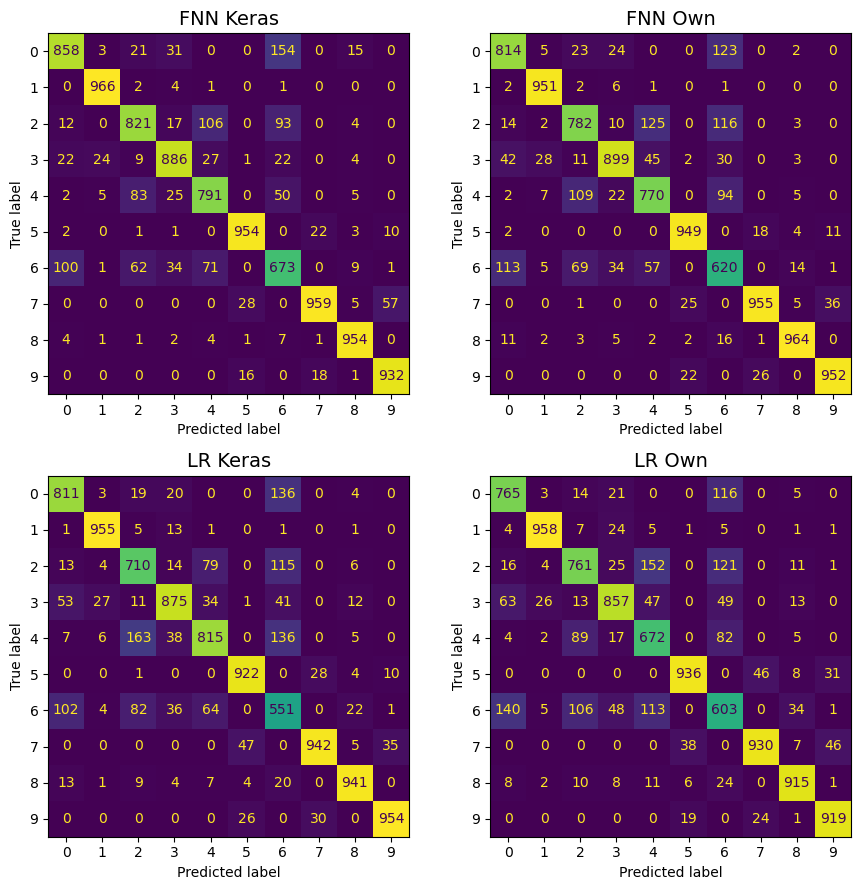

In [54]:
Confusion(Y_Pred_List, Y_Target_List, Method_Labels, figsize=(9, 9), Sub=True)

# Convolutional Neural Network (CNN)
This section implements a Convolutional Neural Network using Keras.

####   CNN_Run: If set to True, the code trains the CNN model over the dataset. 
####   Warning: Training the CNN may take considerable time.


Parameters such as number of filters, kernel size, activation functions, and epochs are defined to optimize the performance of the CNN.
The model's performance is evaluated using accuracy and runtime.

In [55]:
initial_conditions["data_amount"] = 10000

CNN_conditions = {
}
CNN_Run = False

In [56]:
eta_vals_CNN = np.logspace(-5, -2, 4)
epochs_vals_CNN = np.linspace(20, 100, 5).astype(int)

In [57]:
eta_epoch_CNN, eta_values_CNN, epoch_values_CNN, time_matrix_CNN = automate_parameter_search( 
            ModelType = "CNN", Save = CNN_Run, 
            Filename = "CNN_Eta_Epoch", Params = ["eta","epochs"], 
            Param_Vals = [eta_vals_CNN, epochs_vals_CNN], 
            Initial_Conditions = initial_conditions, Custom = CNN_conditions
            )

In [58]:
best_eta_CNN, best_epoch_CNN, max_acc_CNN, runtime_CNN = find_hyperparameters(eta_epoch_CNN, eta_values_CNN, epoch_values_CNN, time_matrix_CNN)
best_epoch_CNN = epoch_values_CNN[1] 
best_eta_CNN = eta_values_CNN[2]

print(f"Best Eta    = {best_eta_CNN}")
print(f"Best Epochs = {best_epoch_CNN}")
print(f"Giving ACC  = {max_acc_CNN:.3g}")
print(f"Runtime     = {runtime_CNN:.1f} s")


CNN_conditions["eta"] = best_eta_CNN
CNN_conditions["epochs"] = best_epoch_CNN

Best Eta    = 0.001
Best Epochs = 40
Giving ACC  = 0.868
Runtime     = 124.2 s


In [59]:
kernel_inputs = np.arange(2,7,1)
kernel_vals = [(x,x) for x in kernel_inputs]
nfilter_vals = np.linspace(5,35,7).astype(int)

In [60]:
kernel_nfilter_CNN, kernel_values_CNN, nfilter_values_CNN, time_matrix2_CNN = automate_parameter_search(
            ModelType = "CNN", Save = CNN_Run, 
            Filename ="CNN_Kernel_nfilter", Params = ["kernel","n_filters"], 
            Param_Vals = [kernel_vals , nfilter_vals], 
            Initial_Conditions = initial_conditions,
            Custom = CNN_conditions
            )

In [61]:
best_kernel, best_nfilter_CNN, max_acc2_CNN, runtime2_CNN = find_hyperparameters(kernel_nfilter_CNN, kernel_inputs, nfilter_values_CNN, time_matrix2_CNN)

print(f"Best filter size       = ({best_kernel},{best_kernel})")
print(f"Best number of filters = {best_nfilter_CNN}")
print(f"Giving ACC             = {max_acc2_CNN:.3g}")
print(f"Runtime                = {runtime2_CNN:.1f} s ")

CNN_conditions["kernel"] = (best_kernel,best_kernel)
CNN_conditions["n_filters"] = best_nfilter_CNN

Best filter size       = (3,3)
Best number of filters = 35
Giving ACC             = 0.879
Runtime                = 109.0 s 


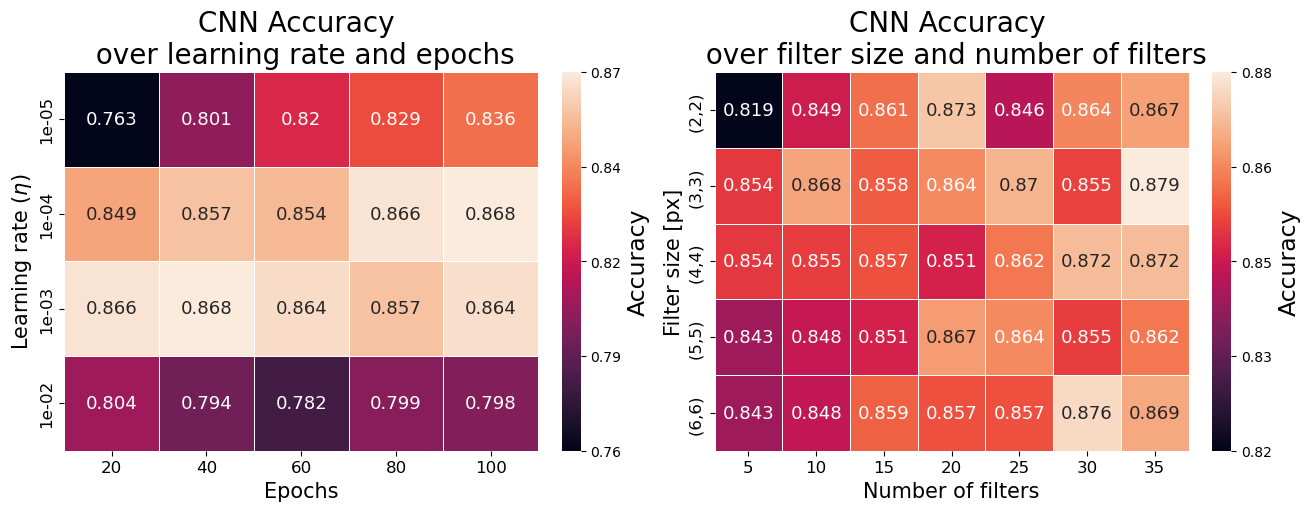

In [62]:
kernel_tix = [f"({int(x)},{int(x)}) " for x in kernel_inputs]
eta_tix_CNN = [f'{float(text):.0e}' for text in eta_values_CNN]

Matrixx = [eta_epoch_CNN, kernel_nfilter_CNN]
Titlee = [f"CNN Accuracy \n over learning rate and epochs", "CNN Accuracy \n over filter size and number of filters"]
Param1Names = [r"Learning rate ($\eta$)",  "Filter size [px]"]
Param2Names = ["Epochs",  "Number of filters"]
Param1s = [eta_tix_CNN, kernel_tix]
Param2s = [epoch_values_CNN.astype(int),  nfilter_values_CNN.astype(int)]

heatmap_acc(Matrixx, Titlee,Param1Names, Param2Names, Param1s, Param2s, Figsize = (13,5),  Sub=True)

# Caculating optimal eta and amount of filters over all data for CNN

In [63]:
initial_conditions["data_amount"] = 60000
eta_vals2 = np.logspace(-4, -3, 5)
nfilter_vals2 = np.arange(30,41,5).astype(int)
CNN_Full1_Run = False

In [64]:
eta_nfilter_CNN_Full, nfilter_values_CNN_Full, eta_values_CNN_Full, time_matrix_CNN_Full = automate_parameter_search( 
            ModelType = "CNN", Save = CNN_Full1_Run, 
            Filename = "CNN_FULL_Eta_nfilter", Params = ["n_filters","eta"], 
            Param_Vals = [nfilter_vals2, eta_vals2], 
            Initial_Conditions = initial_conditions, 
            Custom = CNN_conditions 
            )

In [65]:
best_nfilter_CNN_Full, best_eta_CNN_Full, max_acc_CNN_Full, runtime_CNN_Full = find_hyperparameters(eta_nfilter_CNN_Full, nfilter_values_CNN_Full, 
                                                                                                    eta_values_CNN_Full, time_matrix_CNN_Full)
m, s = format_seconds(runtime_CNN_Full)


print(f"Best Eta               = {best_eta_CNN_Full:.3g}")
print(f"Best Amount of filters = {best_nfilter_CNN_Full}")
print(f"Giving ACC             = {max_acc_CNN_Full:.3g}")
print(f"Runtime                = {runtime_CNN_Full:.1f} s")
print(f"                       = {m:.0f} m {s:.1f} s")


CNN_conditions["eta"] = best_eta_CNN_Full
CNN_conditions["n_filters"] = best_nfilter_CNN_Full

Best Eta               = 0.0001
Best Amount of filters = 40
Giving ACC             = 0.91
Runtime                = 910.0 s
                       = 15 m 10.0 s


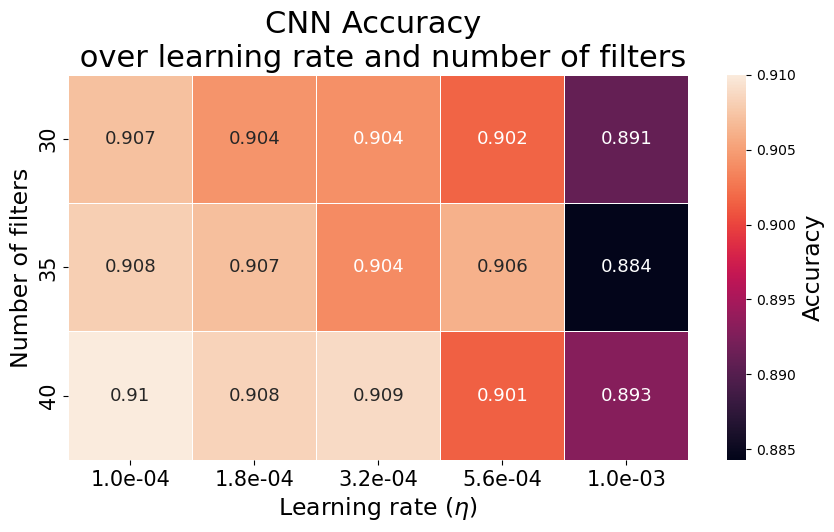

In [66]:
eta_tix2 = [f'{float(text):1.1e}' for text in eta_values_CNN_Full]
heatmap_acc(eta_nfilter_CNN_Full, 
            f"CNN Accuracy \n over learning rate and number of filters", "Number of filters",
            r"Learning rate ($\eta$)",nfilter_values_CNN_Full.astype(int), eta_tix2, Figsize = (10,5))

In [67]:
print("Optimal paramaters found for CNN")
for i in CNN_conditions:
    print(f"{i}: {CNN_conditions[i]}")

Optimal paramaters found for CNN
eta: 0.0001
epochs: 40
kernel: (3, 3)
n_filters: 40


# Final CNN Evaluation


Using the best hyperparameters, the CNN is trained and evaluated on the full dataset. This includes generating predictions and calculating metrics such as accuracy, precision, and runtime.

In [68]:
CNN_Full_Run = False

In [69]:
def RunCNN(Run):
    if Run:
        CNN_Conditions = RewriteDict(initial_conditions, CNN_conditions)
        CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores, CNN_Full_Runtimes = RunKeras(CNN_Conditions, CNN = True, BothTimes=True)
        return CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores, CNN_Full_Runtimes
    else:
        return 0,0,0,0

CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores, CNN_Full_Runtimes = RunCNN(CNN_Full_Run)

In [70]:
def SaveCNN(Run, CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores, CNN_Full_Runtimes):
    if Run:
        CNN_Full_Test = np.argmax(CNN_Full_Test,axis=1)
        CNN_Full_Pred = np.argmax(CNN_Full_Pred,axis=1)
        save_load_data_single("CNN_Full", CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores[1], CNN_Full_Runtimes, Save=True)

SaveCNN(CNN_Full_Run,CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores, CNN_Full_Runtimes)

In [71]:
CNN_Full_Pred, CNN_Full_Test, CNN_Full_Scores, CNN_Full_Runtimes = save_load_data_single("CNN_Full")

In [72]:
m, s = format_seconds(CNN_Full_Runtimes)
CNN_Report = classification_report(CNN_Full_Test, CNN_Full_Pred,digits=3, output_dict=True)

print(f"CNN using Keras with all data")
print(classification_report(CNN_Full_Test, CNN_Full_Pred,digits=3))
print(f"Accuracy: {CNN_Full_Scores*100:.1f}% ")
print(f"Total Runtime:    {np.sum(CNN_Full_Runtimes):.1f} s")
print(f"Training Runtime: {m[0]:.0f} m {s[0]:.1f} s")
print(f"Test     Runtime: {s[1]:.1g} s")

CNN using Keras with all data
              precision    recall  f1-score   support

           0      0.844     0.867     0.855      1000
           1      0.991     0.979     0.985      1000
           2      0.885     0.828     0.855      1000
           3      0.912     0.886     0.899      1000
           4      0.817     0.894     0.854      1000
           5      0.982     0.976     0.979      1000
           6      0.756     0.744     0.750      1000
           7      0.969     0.958     0.963      1000
           8      0.984     0.977     0.980      1000
           9      0.955     0.978     0.966      1000

    accuracy                          0.909     10000
   macro avg      0.909     0.909     0.909     10000
weighted avg      0.909     0.909     0.909     10000

Accuracy: 90.9% 
Total Runtime:    776.7 s
Training Runtime: 12 m 55.6 s
Test     Runtime: 1 s


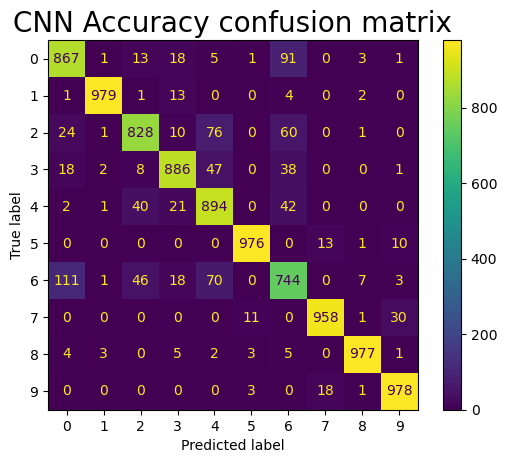

In [73]:
Confusion(CNN_Full_Test, CNN_Full_Pred, "CNN Accuracy confusion matrix", figsize=(12, 8), Sub=False) 

# Model Comparison with Histograms


This section visualizes and compares the performance of different models using histograms, where accuracy and runtime are plotted.
The goal is to provide a clear overview of how each model performed under similar conditions.


In [74]:
from Functions import Histogram

In [75]:
Accuracies = [FNNK_Scores, FNNO_Score, LRK_Scores, LRO_Scores, CNN_Full_Scores]
TrainingRuntimes = [FNNK_Runtime[0], FNNO_Runtimes[0], LRK_Runtimes[0], LRO_Runtimes[0], CNN_Full_Runtimes[0]]
TestRuntimes = [FNNK_Runtime[1], FNNO_Runtimes[1], LRK_Runtimes[1], LRO_Runtimes[1], CNN_Full_Runtimes[1]]

Labels = ['FNN Keras', 'FNN Own  ', 'LR Keras ', 'LR Own   ', 'CNN Keras'] 
TrainingTitle = f'Accuracy and training runtime \n for Classification Methods'
TestTitle = f'Accuracy and testing runtime \n for Classification Methods'

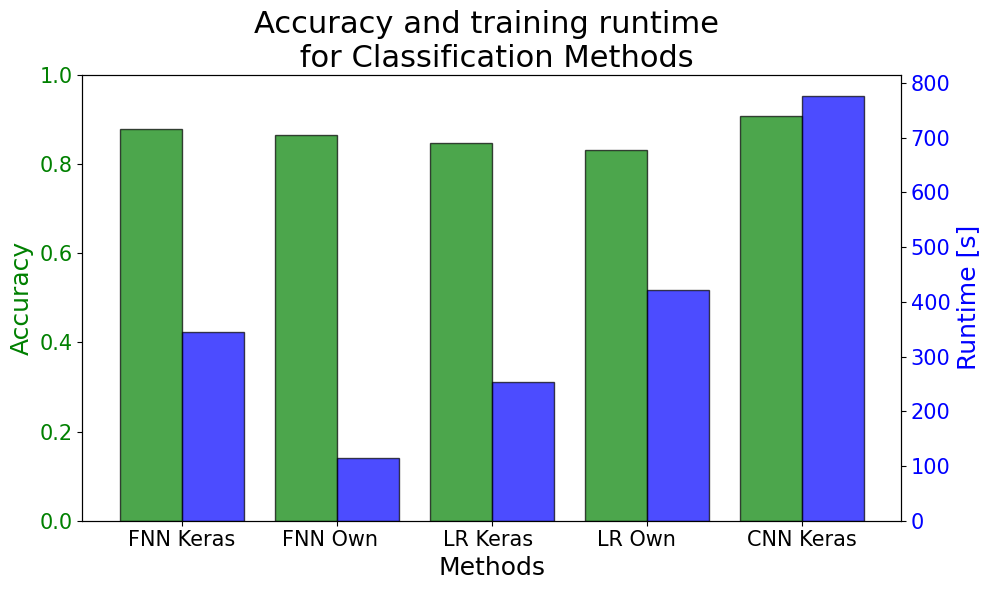

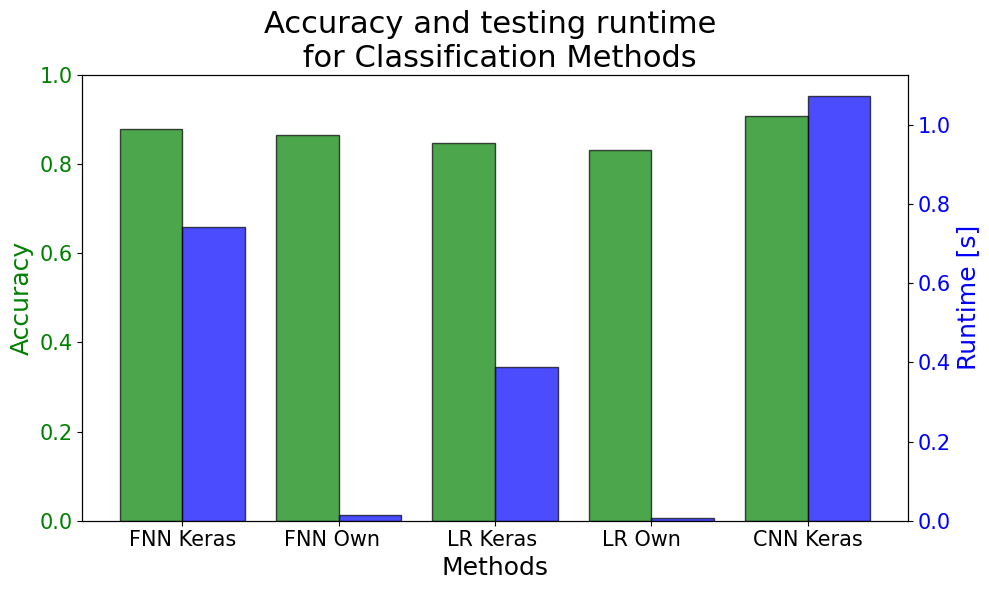

            Accuracies   Training Runtime  Test Runtime
FNN Keras:   87.9%       345.6s            0.74s
FNN Own  :   86.6%       114.0s            0.01s
LR Keras :   84.8%       254.2s            0.39s
LR Own   :   83.2%       421.2s            0.01s
CNN Keras:   90.9%       775.6s            1.07s


In [76]:
Histogram(Accuracies, TrainingRuntimes, Labels, TrainingTitle, FigSize=(10, 6))
Histogram(Accuracies, TestRuntimes, Labels, TestTitle, FigSize=(10, 6))
print(f"            Accuracies   Training Runtime  Test Runtime")
for i in range(len(Accuracies)):
    print(f"{Labels[i]}:   {Accuracies[i]*100:.1f}%       {TrainingRuntimes[i]:.1f}s            {TestRuntimes[i]:.2f}s")

# Precision for every model

In [77]:
from Functions import extract_all_precisions

In [78]:
Reports = [FNNK_Report, FNNO_Report, LRK_Report, LRO_Report , CNN_Report]
Labels = ["FNN Keras", "FNN Own", "LR Keras", "LR Own", "CNN"]

print(extract_all_precisions(Reports, Labels))

      FNN Keras FNN Own LR Keras LR Own    CNN
Class                                         
0         0.793   0.821    0.817  0.828  0.844
1         0.992   0.988    0.977  0.952  0.991
2         0.780   0.743    0.755  0.698  0.885
3         0.890   0.848    0.830  0.802  0.912
4         0.823   0.763    0.697  0.772  0.817
5         0.961   0.964    0.955  0.917  0.982
6         0.708   0.679    0.639  0.574  0.756
7         0.914   0.934    0.915  0.911  0.969
8         0.978   0.958    0.942  0.929  0.984
9         0.964   0.952    0.945  0.954  0.955


# Simple CNN Model


A very basic CNN model is implemented here to serve as a baseline for comparison.
The model consists of a small number of convolutional layers followed by pooling and dense layers.
This is not meant to be a highly optimized model but rather a demonstration of how CNN's perform on the dataset compared to feed-forward neural networks and logistic regression.

Results from this simple CNN are plotted for comparison with other models.

In [79]:
CNN_Compare = {
    "kernel": (2,2),
    "n_filters":5,
    "epochs":20,
    "eta": 1e-3,
    "data_amount":60000
}
initial_conditions["data_amount"] = 60000
CNN_Compare_Run = False

In [80]:
def RunCNNCompare(Run):
    if Run:
        CNN_Comp_Dic = RewriteDict(initial_conditions, CNN_Compare)
        CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores, CNN_Comp_Runtimes = RunKeras(CNN_Comp_Dic, CNN = True, BothTimes=True)
        return CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores, CNN_Comp_Runtimes
    else:
        return 0,0,0,0

CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores, CNN_Comp_Runtimes = RunCNNCompare(CNN_Compare_Run)

In [81]:
def RunCNNCompare(Run, CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores, CNN_Comp_Runtimes):
    if Run:
        CNN_Comp_Test = np.argmax(CNN_Comp_Test,axis=1)
        CNN_Comp_Pred = np.argmax(CNN_Comp_Pred,axis=1)
        save_load_data_single("CNN_Compare", CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores[1], CNN_Comp_Runtimes, Save=True)

RunCNNCompare(CNN_Compare_Run, CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores, CNN_Comp_Runtimes)

In [82]:
CNN_Comp_Pred, CNN_Comp_Test, CNN_Comp_Scores, CNN_Comp_Runtimes = save_load_data_single("CNN_Compare")

In [83]:
CNN_Comp_Report = classification_report(CNN_Comp_Test, CNN_Comp_Pred, digits=3, output_dict=True)
m, s = format_seconds(CNN_Comp_Runtimes)

print(f"CNN using Keras ")
print(classification_report(CNN_Comp_Test, CNN_Comp_Pred, digits=3))
print(f"Accuracy: {CNN_Comp_Scores*100:.1f}% ")
print(f"Total Runtime:    {np.sum(CNN_Comp_Runtimes):.1f} s")
print(f"Training Runtime: {m[0]:.0f} m {s[0]:.1f} s")
print(f"Test     Runtime: {s[1]:.1g} s")

CNN using Keras 
              precision    recall  f1-score   support

           0      0.828     0.822     0.825      1000
           1      0.981     0.976     0.978      1000
           2      0.812     0.823     0.818      1000
           3      0.915     0.863     0.888      1000
           4      0.806     0.820     0.813      1000
           5      0.983     0.953     0.968      1000
           6      0.660     0.684     0.672      1000
           7      0.936     0.974     0.954      1000
           8      0.974     0.974     0.974      1000
           9      0.964     0.955     0.959      1000

    accuracy                          0.884     10000
   macro avg      0.886     0.884     0.885     10000
weighted avg      0.886     0.884     0.885     10000

Accuracy: 88.4% 
Total Runtime:    147.1 s
Training Runtime: 2 m 26.5 s
Test     Runtime: 0.5 s


In [84]:
Accuracies2 = [FNNK_Scores, FNNO_Score, LRK_Scores, LRO_Scores, CNN_Full_Scores , CNN_Comp_Scores]
TrainingRuntimes2 = [FNNK_Runtime[0], FNNO_Runtimes[0], LRK_Runtimes[0], LRO_Runtimes[0], CNN_Full_Runtimes[0] ,CNN_Comp_Runtimes[0]]
TestRuntimes2 = [FNNK_Runtime[1], FNNO_Runtimes[1], LRK_Runtimes[1], LRO_Runtimes[1], CNN_Full_Runtimes[1] , CNN_Comp_Runtimes[1]]

Labels2 = ['FNN Keras', 'FNN Own  ', 'LR Keras ', 'LR Own   ', 'CNN Keras' , 'CNN Simple'] 
TrainingTitle2 = f'Accuracy and training runtime \n With simple CNN model'
TestTitle2 = f'Accuracy and testing runtime \n With simple CNN model'

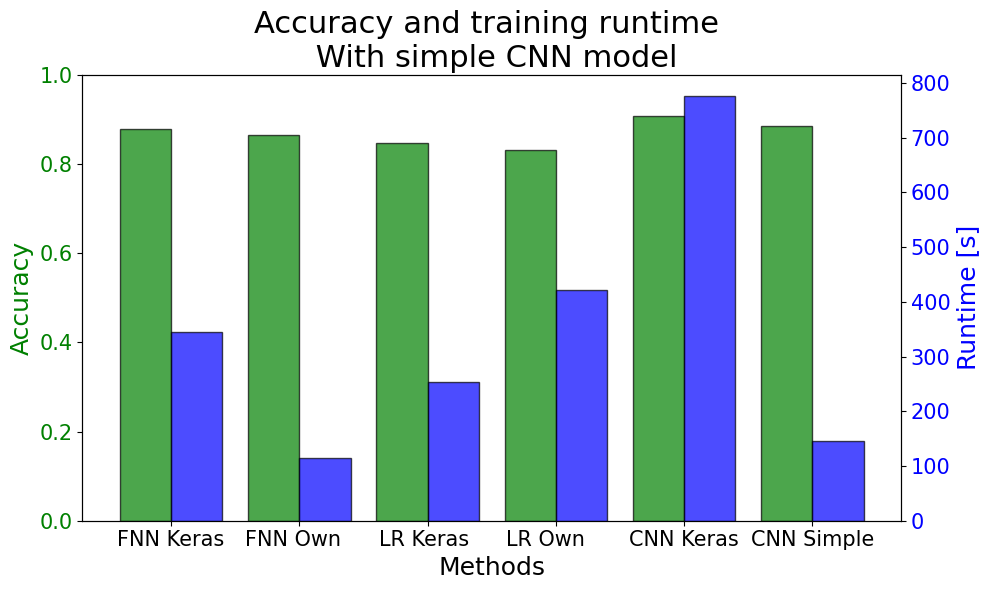

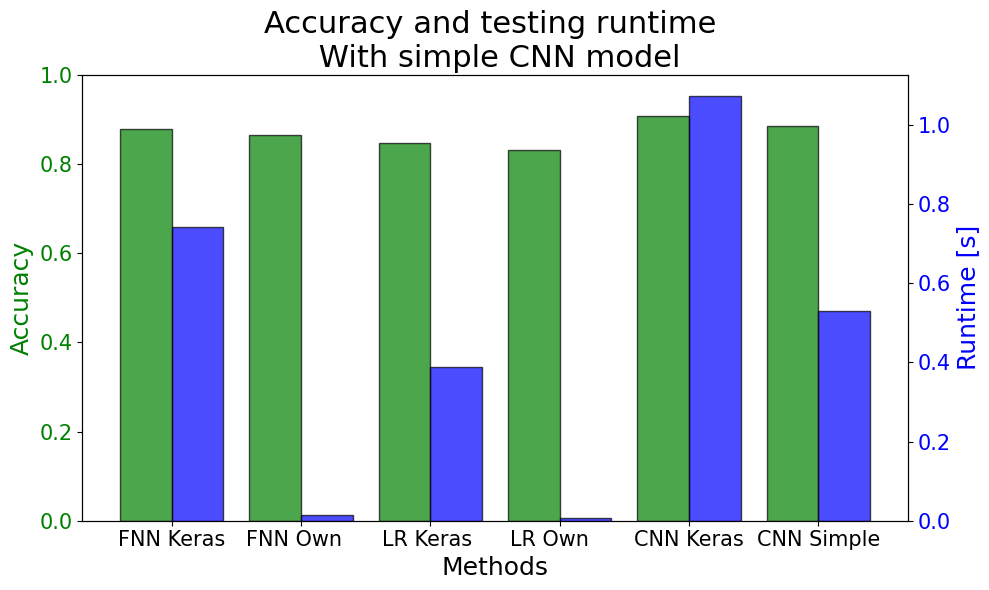

In [85]:

Histogram(Accuracies2, TrainingRuntimes2, Labels2, TrainingTitle2, FigSize=(10, 6))
Histogram(Accuracies2, TestRuntimes2, Labels2, TestTitle2, FigSize=(10, 6))

In [86]:
Reports = [FNNK_Report, FNNO_Report, LRK_Report, LRO_Report , CNN_Report , CNN_Comp_Report]
Labels = ["FNN Keras", "FNN Own", "LR Keras", "LR Own", "CNN", "  SimpleCNN"]

print(extract_all_precisions(Reports, Labels))

      FNN Keras FNN Own LR Keras LR Own    CNN   SimpleCNN
Class                                                     
0         0.793   0.821    0.817  0.828  0.844       0.828
1         0.992   0.988    0.977  0.952  0.991       0.981
2         0.780   0.743    0.755  0.698  0.885       0.812
3         0.890   0.848    0.830  0.802  0.912       0.915
4         0.823   0.763    0.697  0.772  0.817       0.806
5         0.961   0.964    0.955  0.917  0.982       0.983
6         0.708   0.679    0.639  0.574  0.756       0.660
7         0.914   0.934    0.915  0.911  0.969       0.936
8         0.978   0.958    0.942  0.929  0.984       0.974
9         0.964   0.952    0.945  0.954  0.955       0.964
